# EDA- Comparing LLMS

## Setup

In [ ]:
%cd E:\Github_Repo\Info-Retrieve-AI\

In [ ]:
%pip install -r raga_requirements.txt

In [ ]:
# # Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/Web_URL/IRS_Models/RAGA


## Baseline Data

In [ ]:
# Read the Dataset
baseline_data = pd.read_csv(r"E:\Github_Repo\Info-Retrieve-AI\RAGAs\output\syn_gpt_qa_50.csv")

# Fill NaN values in 'ground_truth' column with a specific placeholder
baseline_data['ground_truth'] = baseline_data['ground_truth'].fillna('No response available')
baseline_data

,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,What challenges do auto manufacturers face in ...,"['In both the UK and US, there is currently a ...",Severe price increases imposed via tariffs tha...,simple,[{'title': 'How Disruptive Pricing Will Impact...,True
1,What was the limitation of the quick-serve res...,[' quick-serve restaurant (QSR) we worked with...,The quick-serve restaurant's segmentation solu...,simple,"[{'title': 'Obtain a Deeper, Multidimensional ...",True
2,How does negative press coverage impact a bran...,[' spurred viral videos of fans destroying the...,No response available,simple,"[{'title': 'The Power, and Pitfalls, of Politi...",True
3,How does EVForward provide valuable insight in...,[' to much more effective results.\n\n\nEVForw...,EVForward provides valuable insight into the E...,simple,[{'title': 'Finding the Future of Mobility wit...,True
4,What challenges do landlords face when install...,"[' sharing (i.e., if multiple EVs are plugged ...",Landlords face a balancing act in installing i...,simple,[{'title': 'Multifamily Housing EV Charging: W...,True
5,How can effective sponsorship measurement help...,"[' marketers don’t see the value, or worse sti...",Effective sponsorship measurement provides det...,simple,[{'title': 'Measuring the Value of Sponsorship...,True
6,What is the current availability of charging s...,['EV Potential Not Yet Realized\n\n\nAs we loo...,The number of public charging stations has inc...,simple,"[{'title': 'The Challenges of Making EV Easy',...",True
7,How is the global rideshare industry projected...,['It’s safe to say that ridesharing services l...,The global rideshare industry is projected to ...,simple,[{'title': 'Rideshare Vehicles: A Meaningful B...,True
8,What is the importance of delivering multiface...,['there’s an obstacle in my way\n—\nperhaps I ...,The critical support offered to EV buyers need...,simple,[{'title': 'How to Create an “EV Easy” Mindset...,True
9,What are some of the specific areas that manuf...,"['For fans of the Terminator series of movies,...","Manufacturers, suppliers, and technology compa...",simple,[{'title': 'Rise of the Smart Car: The Shape-S...,True


## GPT-4 Data

In [ ]:
# Read the Dataset
gpt4_data = pd.read_csv(r"E:\Github_Repo\Info-Retrieve-AI\RAGAs\output\gpt4_performance_metrics.csv")
pd.set_option('display.max_columns', None)
gpt4_data

,question,contexts,ground_truth,evolution_type,metadata,episode_done,Response,Reference_Tokens,Response_Tokens,BLEU,ROGUE,BERT_P,BERT_R,BERT_F1,answer,faithfulness,answer_relevancy,context_precision,context_relevancy,context_recall,context_entity_recall,answer_similarity,answer_correctness
0,What challenges do auto manufacturers face in ...,"['In both the UK and US, there is currently a ...",Severe price increases imposed via tariffs tha...,simple,[{'title': 'How Disruptive Pricing Will Impact...,True,Potential massive price hikes due to trade tar...,"['severe', 'price', 'increases', 'imposed', 'v...","['potential', 'massive', 'price', 'hikes', 'du...",9.499367e-02,0.321678,0.874894,0.910280,0.892236,Potential massive price hikes due to trade tar...,0.833333,0.976583,1.0,0.333333,1.0,0.909091,0.923107,0.639859
1,What was the limitation of the quick-serve res...,[' quick-serve restaurant (QSR) we worked with...,The quick-serve restaurant's segmentation solu...,simple,"[{'title': 'Obtain a Deeper, Multidimensional ...",True,The quick-serve restaurant's segmentation solu...,"['the', 'quick-serve', 'restaurant', ""'s"", 'se...","['the', 'quick-serve', 'restaurant', ""'s"", 'se...",2.985456e-01,0.571429,0.921405,0.971298,0.945694,The quick-serve restaurant's segmentation solu...,0.750000,0.930490,1.0,1.000000,1.0,1.000000,0.965056,0.541264
2,How does EVForward provide valuable insight in...,[' to much more effective results.\n\n\nEVForw...,EVForward provides valuable insight into the E...,simple,[{'title': 'Finding the Future of Mobility wit...,True,EVForward provides valuable insight into the E...,"['evforward', 'provides', 'valuable', 'insight...","['evforward', 'provides', 'valuable', 'insight...",1.173411e-01,0.364780,0.862064,0.924760,0.892312,Landlords of multifamily housing face several ...,0.777778,0.991803,1.0,0.666667,1.0,0.833333,0.954055,0.852150
3,What challenges do landlords face when install...,"[' sharing (i.e., if multiple EVs are plugged ...",Landlords face a balancing act in installing i...,simple,[{'title': 'Multifamily Housing EV Charging: W...,True,Landlords of multifamily housing face several ...,"['landlords', 'face', 'a', 'balancing', 'act',...","['landlords', 'of', 'multifamily', 'housing', ...",1.488835e-01,0.336957,0.870464,0.911350,0.890438,Effective sponsorship measurement can help in ...,1.000000,0.999999,1.0,1.000000,1.0,1.000000,0.966893,0.841723
4,How can effective sponsorship measurement help...,"[' marketers don’t see the value, or worse sti...",Effective sponsorship measurement provides det...,simple,[{'title': 'Measuring the Value of Sponsorship...,True,Effective sponsorship measurement can help in ...,"['effective', 'sponsorship', 'measurement', 'p...","['effective', 'sponsorship', 'measurement', 'c...",1.492871e-01,0.431373,0.907173,0.941681,0.924105,The text does not provide a specific number or...,0.750000,0.000000,0.0,1.000000,1.0,1.000000,0.893474,0.223369
5,What is the current availability of charging s...,['EV Potential Not Yet Realized\n\n\nAs we loo...,The number of public charging stations has inc...,simple,"[{'title': 'The Challenges of Making EV Easy',...",True,The text does not provide a specific number or...,"['the', 'number', 'of', 'public', 'charging', ...","['the', 'text', 'does', 'not', 'provide', 'a',...",3.010855e-155,0.202247,0.867870,0.879603,0.873697,The global rideshare industry is projected to ...,1.000000,0.978265,1.0,1.000000,1.0,1.000000,1.000000,1.000000
6,How is the global rideshare industry projected...,['It’s safe to say that ridesharing services l...,The global rideshare industry is projected to ...,simple,[{'title': 'Rideshare Vehicles: A Meaningful B...,True,The global rideshare industry is projected to ...,"['the', 'global', 'rideshare', 'industry', 'is...","['the', 'global', 'rideshare', 'industry', 'is...",1.000000e+00,1.000000,1.000000,1.000000,1.000000,Delivering multifaceted EV support to EV buyer...,0.875000,0.982911,1.0,1.000000,1.0,1.000000,0.930392,

### Remove Duplicate Columns

In [ ]:
# normalized_columns = gpt4_data.columns.str.replace(r'\.\d+$','', regex=True)
# normalized_columns

In [ ]:
# duplicated_columns = normalized_columns.duplicated()
# duplicated_columns

In [ ]:
# df_unique = gpt4_data.loc[:, ~duplicated_columns]
# df_unique

In [ ]:
# df_unique.to_csv('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/Web_URL/IRS_Models/RAGA/GPT-4_Performance_Metrics_Unique.csv', index=False)

## Gemini Data

In [ ]:
# Read the Dataset
gemini_data = pd.read_csv(r"E:\Github_Repo\Info-Retrieve-AI\RAGAs\output\gemini_performance_metrics.csv")
pd.set_option('display.max_columns', None)
gemini_data

,question,contexts,ground_truth,evolution_type,metadata,episode_done,Response,Reference_Tokens,Response_Tokens,BLEU,ROGUE,BERT_P,BERT_R,BERT_F1,answer,faithfulness,answer_relevancy,context_precision,context_relevancy,context_recall,context_entity_recall,answer_similarity,answer_correctness
0,What challenges do auto manufacturers face in ...,"['In both the UK and US, there is currently a ...",Severe price increases imposed via tariffs tha...,simple,[{'title': 'How Disruptive Pricing Will Impact...,True,**Challenges for Auto Manufacturers Due to Pot...,"['severe', 'price', 'increases', 'imposed', 'v...","['*', '*', 'challenges', 'for', 'auto', 'manuf...",3.008812e-02,0.212598,0.813526,0.882351,0.846542,**Challenges for Auto Manufacturers Due to Pot...,1.000000,0.990047,1.0,0.333333,1.0,0.909091,0.875285,0.414474
1,What was the limitation of the quick-serve res...,[' quick-serve restaurant (QSR) we worked with...,The quick-serve restaurant's segmentation solu...,simple,"[{'title': 'Obtain a Deeper, Multidimensional ...",True,The quick-serve restaurant's segmentation solu...,"['the', 'quick-serve', 'restaurant', ""'s"", 'se...","['the', 'quick-serve', 'restaurant', ""'s"", 'se...",3.171809e-01,0.613333,0.923757,0.968018,0.945370,The quick-serve restaurant's segmentation solu...,1.000000,0.994279,1.0,1.000000,1.0,1.000000,0.967174,0.670366
2,How does negative press coverage impact a bran...,[' spurred viral videos of fans destroying the...,No response available,simple,"[{'title': 'The Power, and Pitfalls, of Politi...",True,The information provided does not directly add...,"['no', 'response', 'available']","['the', 'information', 'provided', 'does', 'no...",0.000000e+00,0.000000,0.798475,0.834026,0.815863,The information provided does not directly add...,NaN,0.000000,0.0,0.000000,0.0,1.000000,0.792917,0.198205
3,How does EVForward provide valuable insight in...,[' to much more effective results.\n\n\nEVForw...,EVForward provides valuable insight into the E...,simple,[{'title': 'Finding the Future of Mobility wit...,True,EVForward provides valuable insight into the E...,"['evforward', 'provides', 'valuable', 'insight...","['evforward', 'provides', 'valuable', 'insight...",2.336828e-01,0.476923,0.873407,0.942777,0.906767,EVForward provides valuable insight into the E...,0.400000,0.894055,1.0,1.000000,1.0,1.000000,0.954006,0.738501
4,What challenges do landlords face when install...,"[' sharing (i.e., if multiple EVs are plugged ...",Landlords face a balancing act in installing i...,simple,[{'title': 'Multifamily Housing EV Charging: W...,True,Landlords face several challenges when install...,"['landlords', 'face', 'a', 'balancing', 'act',...","['landlords', 'face', 'several', 'challenges',...",7.335263e-79,0.231579,0.847477,0.869530,0.858362,Landlords face several challenges when install...,1.000000,0.998204,1.0,0.666667,1.0,0.833333,0.944082,0.902686
5,How can effective sponsorship measurement help...,"[' marketers don’t see the value, or worse sti...",Effective sponsorship measurement provides det...,simple,[{'title': 'Measuring the Value of Sponsorship...,True,Effective sponsorship measurement can greatly ...,"['effective', 'sponsorship', 'measurement', 'p...","['effective', 'sponsorship', 'measurement', 'c...",2.582380e-02,0.232044,0.818687,0.873639,0.845271,Effective sponsorship measurement can greatly ...,1.000000,0.959722,1.0,1.000000,1.0,1.000000,0.939366,0.643932
6,What is the current availability of charging s...,['EV Potential Not Yet Realized\n\n\nAs we loo...,The number of public charging stations has inc...,simple,"[{'title': 'The Challenges of Making EV Easy',...",True,"Unfortunately, the provided text does not spec...","['the', 'number', 'of', 'public', 'charging', ...","['unfortunately', ',', 'the', 'provided', 'tex...",2.459172e-155,0.148148,0.846510,0.868380,0.857306,"Unfortunately, the provided text does not spec...",0.500000,0.000000,0.0,1.000000,1.0,1.000000,0.899452,0.224852
7,How is the global rideshare indust

### Remove Duplicate Columns

In [ ]:
# normalized_columns = gemini_data.columns.str.replace(r'\.\d+$','', regex=True)
# normalized_columns

In [ ]:
# duplicated_columns = normalized_columns.duplicated()
# duplicated_columns

In [ ]:
# df_unique = gemini_data.loc[:, ~duplicated_columns]
# df_unique

In [ ]:
# df_unique.to_csv('/content/drive/MyDrive/Colab_Notebooks/Capstone_Project/Web_URL/IRS_Models/RAGA/Gemini_Performance_Metrics_Unique.csv', index=False)

## Statistics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Metrics to analyze
metrics = ['BERT_F1', 'BERT_R', 'BERT_P', 'BLEU', 'ROGUE', 'faithfulness', 'answer_relevancy', 'answer_correctness', 'context_precision', 'context_relevancy', 'context_recall', 'context_entity_recall', 'answer_similarity']

In [ ]:
# Descriptive Statistics
def descriptive_stats(df, features):
    return df[features].describe()

# Example usage
print("Descriptive Statistics for GPT-4:")
print(descriptive_stats(gpt4_data, metrics))

Descriptive Statistics for GPT-4:
         BERT_F1     BERT_R     BERT_P           BLEU      ROGUE  \
count  46.000000  46.000000  46.000000   4.600000e+01  46.000000   
mean    0.888369   0.909070   0.869012   1.299281e-01   0.324191   
std     0.032748   0.032095   0.038443   1.557381e-01   0.162852   
min     0.823365   0.813099   0.803325  1.120041e-231   0.080717   
25%     0.868079   0.895979   0.839539   3.356341e-02   0.201355   
50%     0.889656   0.908066   0.867624   9.439033e-02   0.319895   
75%     0.904464   0.924275   0.894355   1.639408e-01   0.389277   
max     1.000000   1.000000   1.000000   1.000000e+00   1.000000   

       faithfulness  answer_relevancy  answer_correctness  context_precision  \
count     43.000000         46.000000           46.000000          46.000000   
mean       0.914959          0.872673            0.651835           0.956522   
std        0.131422          0.274916            0.230578           0.206185   
min        0.500000          0.00

In [ ]:
print("Descriptive Statistics for Gemini:")
print(descriptive_stats(gemini_data, metrics))

Descriptive Statistics for Gemini:
         BERT_F1     BERT_R     BERT_P       BLEU      ROGUE  faithfulness  \
count  50.000000  50.000000  50.000000  50.000000  50.000000     44.000000   
mean    0.859880   0.889125   0.832991   0.061346   0.233570      0.899766   
std     0.031682   0.034826   0.035421   0.068502   0.128039      0.235796   
min     0.780988   0.812473   0.751434   0.000000   0.000000      0.000000   
25%     0.842591   0.873139   0.812426   0.015778   0.156358      1.000000   
50%     0.853806   0.888077   0.827212   0.038461   0.222202      1.000000   
75%     0.879053   0.903850   0.847798   0.102873   0.312217      1.000000   
max     0.945370   0.979003   0.923757   0.317181   0.613333      1.000000   

       answer_relevancy  answer_correctness  context_precision  \
count         50.000000           50.000000          50.000000   
mean           0.802617            0.563416           0.880000   
std            0.355474            0.280887           0.328261  

In [ ]:
summary = pd.DataFrame({
    'Metric': ['Faithfulness', 'Answer Relevancy', 'Answer Correctness', 'Answer Similarity'],
    'GPT-4 Mean': [gpt4_data['faithfulness'].mean(), gpt4_data['answer_relevancy'].mean(), gpt4_data['answer_correctness'].mean(), gpt4_data['answer_similarity'].mean()],
    'Gemini Mean': [gemini_data['faithfulness'].mean(), gemini_data['answer_relevancy'].mean(), gemini_data['answer_correctness'].mean(), gemini_data['answer_similarity'].mean()]
})
summary

,Metric,GPT-4 Mean,Gemini Mean
0,Faithfulness,0.914959,0.899766
1,Answer Relevancy,0.872673,0.802617
2,Answer Correctness,0.651835,0.563416
3,Answer Similarity,0.940689,0.912045


In [ ]:
gpt4_bert_score = (gpt4_data['BERT_P'].mean() * gpt4_data['BERT_R'].mean() * gpt4_data['BERT_F1'].mean()) ** (1/3)
gemini_bert_score = (gemini_data['BERT_P'].mean() * gemini_data['BERT_R'].mean() * gemini_data['BERT_F1'].mean()) ** (1/3)

summarybert = pd.DataFrame({
    'Metric': ['BERT_P', 'BERT_R', 'BERT_F1', 'BERT Score'],
    'GPT-4 Mean': [gpt4_data['BERT_P'].mean(), gpt4_data['BERT_R'].mean(), gpt4_data['BERT_F1'].mean(), gpt4_bert_score],
    'Gemini Mean': [gemini_data['BERT_P'].mean(), gemini_data['BERT_R'].mean(), gemini_data['BERT_F1'].mean(), gemini_bert_score]
})

summarybert

,Metric,GPT-4 Mean,Gemini Mean
0,BERT_P,0.869012,0.832991
1,BERT_R,0.909070,0.889125
2,BERT_F1,0.888369,0.859880
3,BERT Score,0.888667,0.860360


In [ ]:
# T-Test
from scipy.stats import ttest_ind
import numpy as np

def compare_means(df1, df2, feature):
    data1 = df1[feature].dropna()
    data2 = df2[feature].dropna()
    stat, p_value = ttest_ind(data1, data2)

    # Calculating degrees of freedom
    df = len(data1) + len(data2) - 2

    # Calculating Cohen's d for effect size
    pooled_std = np.sqrt(((len(data1) - 1) * np.var(data1) + (len(data2) - 1) * np.var(data2)) / df)
    cohen_d = (np.mean(data1) - np.mean(data2)) / pooled_std

    return stat, p_value, df, cohen_d

# Running t-tests across all metrics and printing all results
for metric in metrics:
    stat, p, df, cohen_d = compare_means(gpt4_data, gemini_data, metric)
    print(f"T-test for '{metric}' between GPT-4 and Gemini: Statistic = {stat:.2f}, P-value = {p:.4f}, Degrees of Freedom = {df}, Cohen's d = {cohen_d:.2f}")

T-test for 'BERT_F1' between GPT-4 and Gemini: Statistic = 4.33, P-value = 0.0000, Degrees of Freedom = 94, Cohen's d = 0.89
T-test for 'BERT_R' between GPT-4 and Gemini: Statistic = 2.91, P-value = 0.0045, Degrees of Freedom = 94, Cohen's d = 0.60
T-test for 'BERT_P' between GPT-4 and Gemini: Statistic = 4.78, P-value = 0.0000, Degrees of Freedom = 94, Cohen's d = 0.99
T-test for 'BLEU' between GPT-4 and Gemini: Statistic = 2.83, P-value = 0.0057, Degrees of Freedom = 94, Cohen's d = 0.58
T-test for 'ROGUE' between GPT-4 and Gemini: Statistic = 3.04, P-value = 0.0030, Degrees of Freedom = 94, Cohen's d = 0.63
T-test for 'faithfulness' between GPT-4 and Gemini: Statistic = 0.37, P-value = 0.7123, Degrees of Freedom = 85, Cohen's d = 0.08
T-test for 'answer_relevancy' between GPT-4 and Gemini: Statistic = 1.07, P-value = 0.2858, Degrees of Freedom = 94, Cohen's d = 0.22
T-test for 'answer_correctness' between GPT-4 and Gemini: Statistic = 1.68, P-value = 0.0968, Degrees of Freedom = 94,

In [ ]:
from scipy import stats
import numpy as np

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data.dropna())
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def effect_size(d1, d2):
    return (d1.mean() - d2.mean()) / np.sqrt((d1.std()**2 + d2.std()**2) / 2)

# Example: Print confidence intervals and effect sizes
for metric in metrics:
    mean, lower, upper = mean_confidence_interval(gpt4_data[metric])
    print(f"{metric} - GPT-4 Mean: {mean:.2f}, CI: [{lower:.2f}, {upper:.2f}]")
    mean, lower, upper = mean_confidence_interval(gemini_data[metric])
    print(f"{metric} - Gemini Mean: {mean:.2f}, CI: [{lower:.2f}, {upper:.2f}]")
    es = effect_size(gpt4_data[metric], gemini_data[metric])
    print(f"Effect Size for {metric}: {es:.2f}\n")

BERT_F1 - GPT-4 Mean: 0.89, CI: [0.88, 0.90]
BERT_F1 - Gemini Mean: 0.86, CI: [0.85, 0.87]
Effect Size for BERT_F1: 0.88

BERT_R - GPT-4 Mean: 0.91, CI: [0.90, 0.92]
BERT_R - Gemini Mean: 0.89, CI: [0.88, 0.90]
Effect Size for BERT_R: 0.60

BERT_P - GPT-4 Mean: 0.87, CI: [0.86, 0.88]
BERT_P - Gemini Mean: 0.83, CI: [0.82, 0.84]
Effect Size for BERT_P: 0.97

BLEU - GPT-4 Mean: 0.13, CI: [0.08, 0.18]
BLEU - Gemini Mean: 0.06, CI: [0.04, 0.08]
Effect Size for BLEU: 0.57

ROGUE - GPT-4 Mean: 0.32, CI: [0.28, 0.37]
ROGUE - Gemini Mean: 0.23, CI: [0.20, 0.27]
Effect Size for ROGUE: 0.62

faithfulness - GPT-4 Mean: 0.91, CI: [0.87, 0.96]
faithfulness - Gemini Mean: 0.90, CI: [0.83, 0.97]
Effect Size for faithfulness: 0.08

answer_relevancy - GPT-4 Mean: 0.87, CI: [0.79, 0.95]
answer_relevancy - Gemini Mean: 0.80, CI: [0.70, 0.90]
Effect Size for answer_relevancy: 0.22

answer_correctness - GPT-4 Mean: 0.65, CI: [0.58, 0.72]
answer_correctness - Gemini Mean: 0.56, CI: [0.48, 0.64]
Effect Size 

## Plots

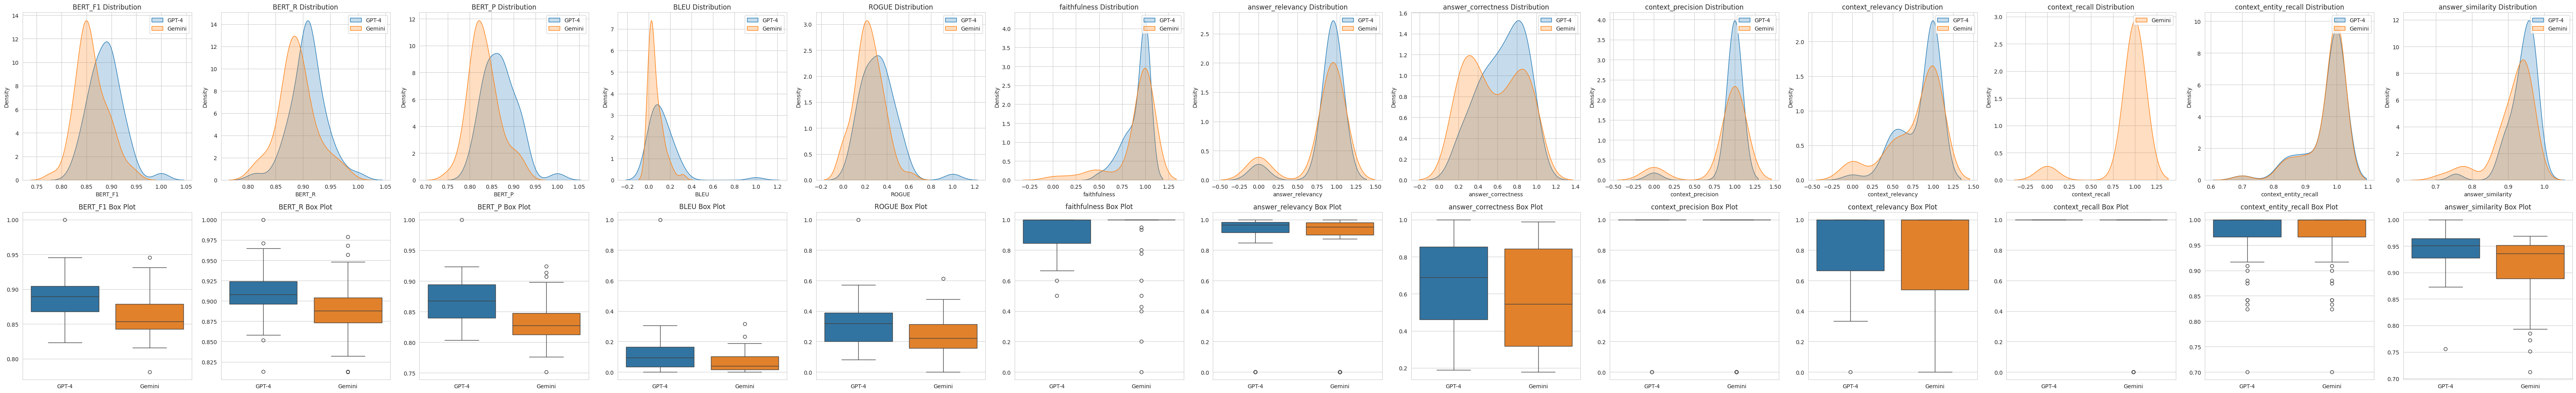

In [ ]:
# Function to plot comparisons between two dataframes
def plot_comparisons(df1, df2, metrics, df1_name='Model 1', df2_name='Model 2'):
    sns.set_style("whitegrid")

    num_metrics = len(metrics)
    fig, axs = plt.subplots(2, num_metrics, figsize=(5 * num_metrics, 10))

    for i, metric in enumerate(metrics):
        # KDE plot for metric
        sns.kdeplot(data=df1[metric].dropna(), ax=axs[0, i], fill=True, common_norm=False, label=df1_name)
        sns.kdeplot(data=df2[metric].dropna(), ax=axs[0, i], fill=True, common_norm=False, label=df2_name)
        axs[0, i].set_title(f'{metric} Distribution')
        axs[0, i].legend()

        # Box plot for metric
        combined_data = pd.concat([df1[metric].rename(df1_name), df2[metric].rename(df2_name)], axis=1)
        sns.boxplot(data=combined_data, ax=axs[1, i])
        axs[1, i].set_title(f'{metric} Box Plot')

    plt.tight_layout()
    plt.show()

# Example DataFrame filtering if necessary
gpt4_metrics = gpt4_data[metrics]
gemini_metrics = gemini_data[metrics]

plot_comparisons(gpt4_metrics, gemini_metrics, metrics, df1_name='GPT-4', df2_name='Gemini')

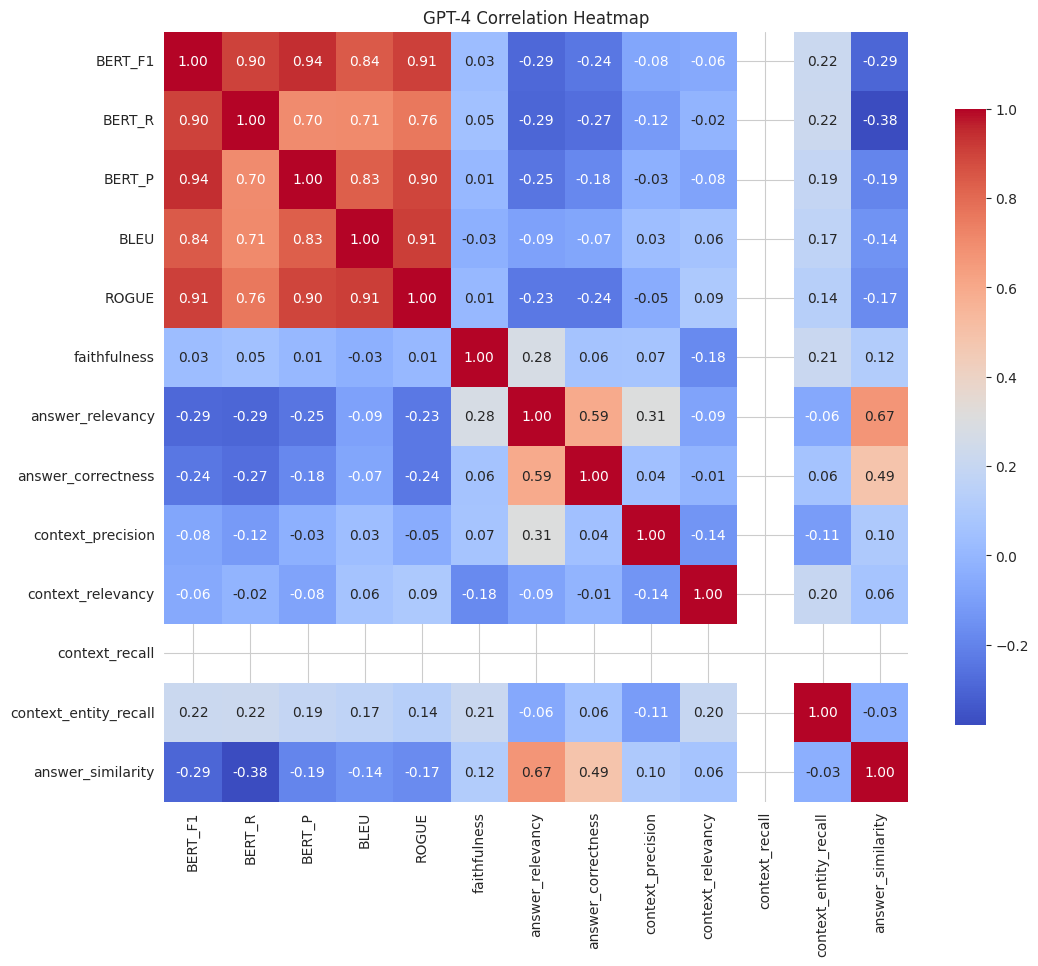

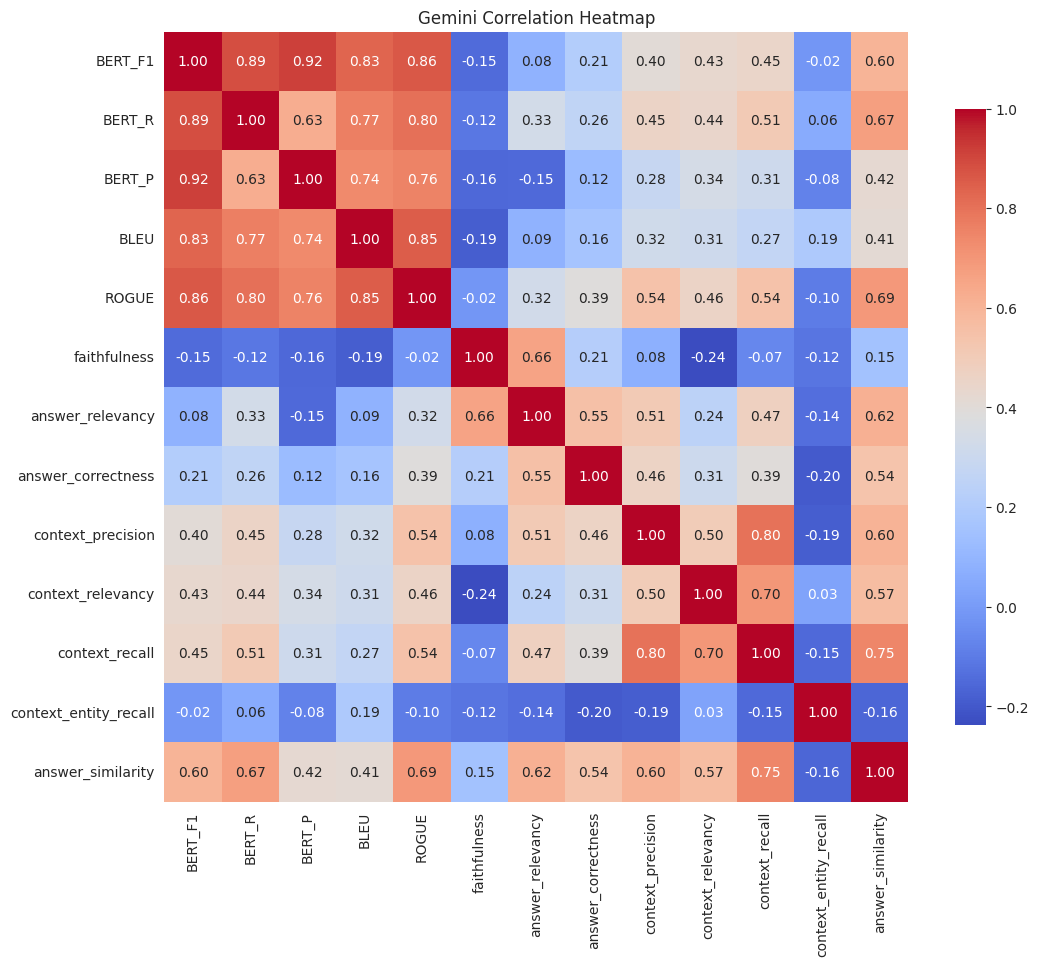

In [ ]:
def plot_heatmap(df, title):
    plt.figure(figsize=(12, 10))  # Adjusted size for better readability with more metrics
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})
    plt.title(title)
    plt.show()

# Example usage with GPT-4 data
plot_heatmap(gpt4_data[metrics], 'GPT-4 Correlation Heatmap')

# Example usage with Gemini data
plot_heatmap(gemini_data[metrics], 'Gemini Correlation Heatmap')

In [ ]:
# Function to plot average scores for two dataframes
def plot_average_scores(df1, df2, metrics, labels):
    averages1 = [df1[metric].mean() for metric in metrics]
    averages2 = [df2[metric].mean() for metric in metrics]

    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, averages1, width, label=labels[0])
    rects2 = ax.bar(x + width/2, averages2, width, label=labels[1])

    ax.set_ylabel('Scores')
    ax.set_title('Average scores by metric and model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Function to plot scatter comparison for two metrics
def plot_scatter_comparison(df, x_metric, y_metric, label):
    sns.scatterplot(data=df, x=x_metric, y=y_metric)
    plt.title(f'{label}: {x_metric} vs {y_metric}')
    plt.show()

# Function to plot stacked bar plots for score ranges
def plot_stacked_bar(df, metric, label):
    ranges = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
    df['range'] = pd.cut(df[metric], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=ranges, include_lowest=True)
    count_ranges = df['range'].value_counts(normalize=True).reindex(ranges)

    count_ranges.plot(kind='bar', stacked=True, color=sns.color_palette("viridis", len(ranges)))
    plt.title(f'Distribution of {metric} scores in {label}')
    plt.ylabel('Proportion')
    plt.xlabel('Score Ranges')
    plt.show()

# Function to plot count heatmap
def plot_count_heatmap(df, metrics, label):
    count_data = pd.DataFrame()
    for metric in metrics:
        # Here, assuming you want to use cut to create categorical bins and count them
        count_data[metric] = pd.cut(df[metric], bins=5, include_lowest=True).value_counts().sort_index()

    sns.heatmap(count_data.T, annot=True, fmt=".2f", cmap='Blues')  # Change format code here to handle floats
    plt.title(f'Count of Scores by Range for {label}')
    plt.ylabel('Metrics')
    plt.xlabel('Score Ranges')
    plt.show()


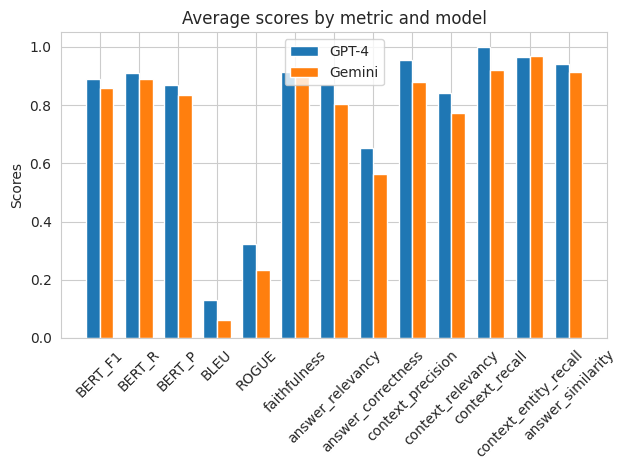

In [ ]:
# Plotting all visualizations
plot_average_scores(gpt4_data, gemini_data, metrics, ['GPT-4', 'Gemini'])

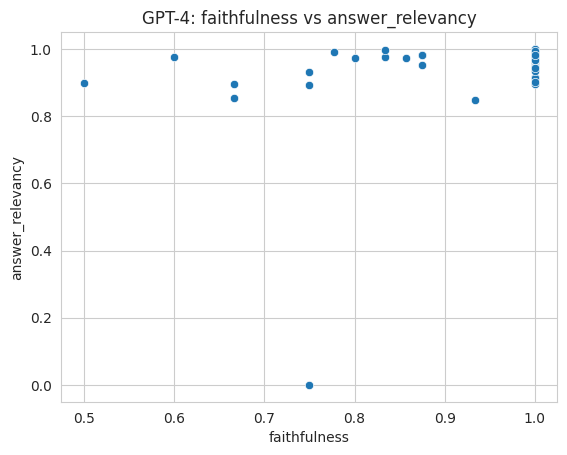

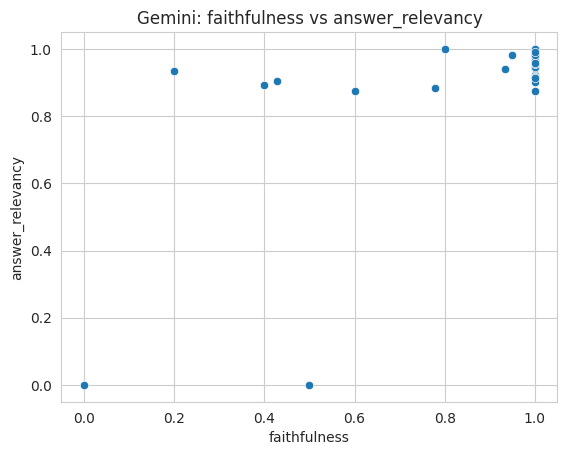

In [ ]:
# Plotting all visualizations
plot_scatter_comparison(gpt4_data, 'faithfulness', 'answer_relevancy', 'GPT-4')
plot_scatter_comparison(gemini_data, 'faithfulness', 'answer_relevancy', 'Gemini')

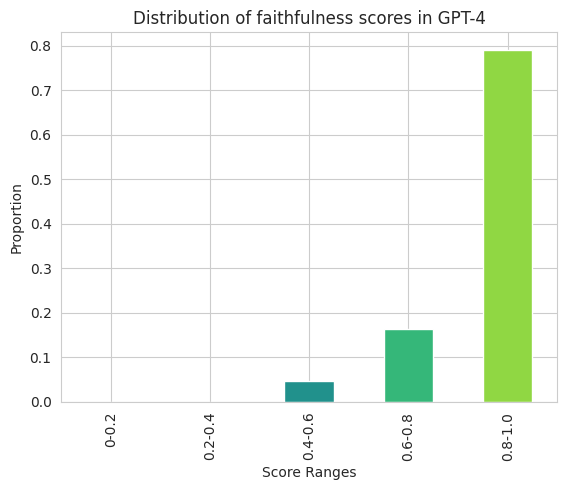

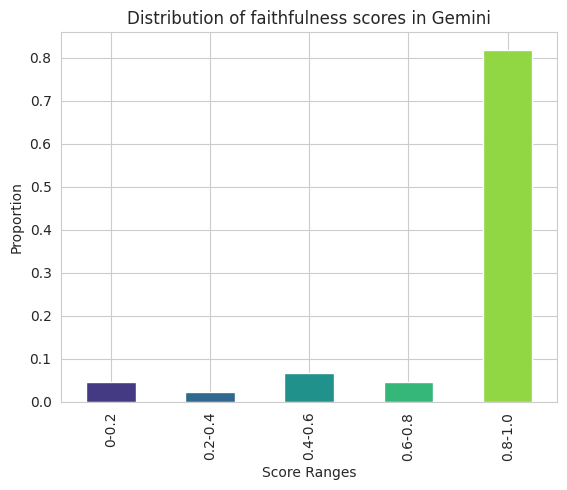

In [ ]:
plot_stacked_bar(gpt4_data, 'faithfulness', 'GPT-4')
plot_stacked_bar(gemini_data, 'faithfulness', 'Gemini')

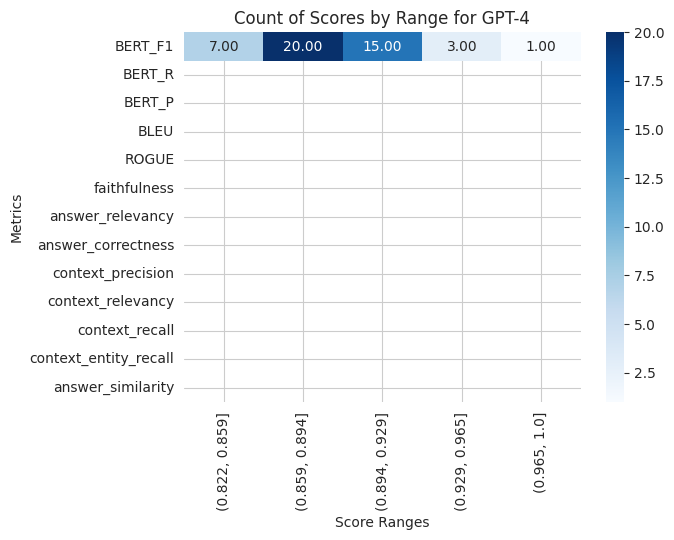

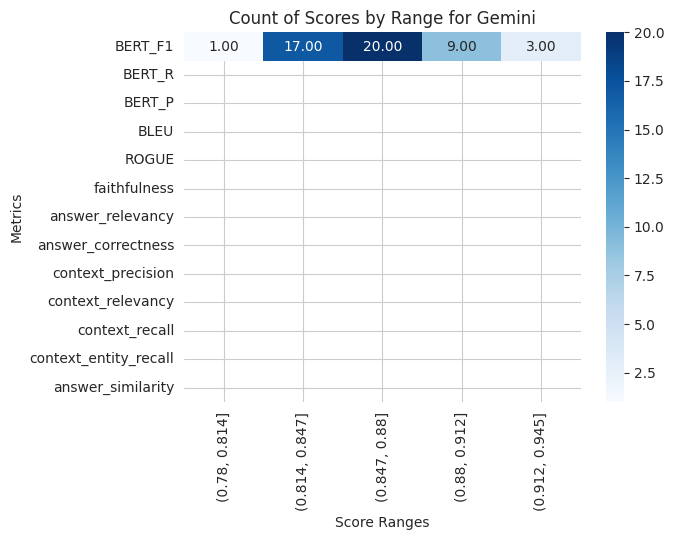

In [ ]:
# Example usage with GPT-4 data
plot_count_heatmap(gpt4_data, metrics, 'GPT-4')

# Example usage with Gemini data
plot_count_heatmap(gemini_data, metrics, 'Gemini')

## Test Analysis

In [ ]:
# Combine summaries into one DataFrame
final_summary = pd.concat([summary, summarybert])

# Save the DataFrame to a CSV file
final_summary.to_csv(r"E:\Github_Repo\Info-Retrieve-AI\RAGAs\output\modelcomparisonresults.csv", index=False)

print("Results saved to 'modelcomparisonresults.csv'")

Results saved to 'modelcomparisonresults.csv'


In [ ]:
metrics = ['faithfulness', 'answer_relevancy', 'answer_correctness', 'answer_similarity', 'BERT_P', 'BERT_R', 'BERT_F1']

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data.dropna())
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def effect_size(d1, d2):
    return (d1.mean() - d2.mean()) / np.sqrt((d1.std()**2 + d2.std()**2) / 2)

results = {
    'Metric': [],
    'GPT-4 Mean': [],
    'GPT-4 CI': [],
    'Gemini Mean': [],
    'Gemini CI': [],
    'Effect Size': []
}

for metric in metrics:
    mean, lower, upper = mean_confidence_interval(gpt4_data[metric])
    results['Metric'].append(metric)
    results['GPT-4 Mean'].append(mean)
    results['GPT-4 CI'].append(f"[{lower:.2f}, {upper:.2f}]")

    mean, lower, upper = mean_confidence_interval(gemini_data[metric])
    results['Gemini Mean'].append(mean)
    results['Gemini CI'].append(f"[{lower:.2f}, {upper:.2f}]")

    es = effect_size(gpt4_data[metric], gemini_data[metric])
    results['Effect Size'].append(es)

# Create DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv(r"E:\Github_Repo\Info-Retrieve-AI\RAGAs\output\metrics_analysis.csv", index=False)

print("Results saved to 'metrics_analysis.csv'")

Results saved to 'metrics_analysis.csv'


In [ ]:
# # Pair Plot
# sns.pairplot(gpt4_data[metrics])
# plt.suptitle('Pairplot of Metrics for GPT-4', y=1.02)
# plt.show()

# metrics = ['faithfulness', 'answer_relevancy', 'answer_correctness', 'context_precision', 'context_relevancy', 'context_recall', 'context_entity_recall', 'answer_similarity', 'BERT_F1', 'BERT_R', 'BERT_P']

# # Violin Plot for Comparative Distribution
# plt.figure(figsize=(12, 6))
# for i, metric in enumerate(metrics):
#     plt.subplot(1, len(metrics), i+1)
#     sns.violinplot(data=[gpt4_data[metric], gemini_data[metric]], palette="muted")
#     plt.title(metric)
# plt.tight_layout()
# plt.show()

In [ ]:
# # CDF Plot
# def plot_cdf(data, label):
#     sorted_data = np.sort(data.dropna())
#     yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
#     plt.plot(sorted_data, yvals, label=label)

# metrics = ['faithfulness', 'answer_relevancy', 'answer_correctness', 'context_precision', 'context_relevancy', 'context_recall', 'context_entity_recall', 'answer_similarity', 'BERT_F1', 'BERT_R', 'BERT_P']
# plt.figure(figsize=(12, 6))
# for metric in metrics:
#     plot_cdf(gpt4_data[metric], f'GPT-4 {metric}')
#     plot_cdf(gemini_data[metric], f'Gemini {metric}')
#     plt.title(f'Cumulative Distribution of {metric}')
#     plt.legend()
#     plt.show()